<a href="https://colab.research.google.com/github/Rajeeb321123/Pytorch/blob/master/01-regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Introduction of Regression

In [ ]:
%%capture
!pip install torchviz

2.5.1+cu121


In [ ]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

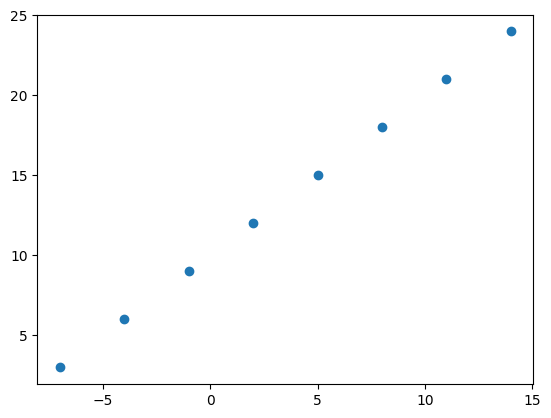

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


# Visualize it
plt.scatter(X, y)

### Input and Output shape

In [ ]:
import torch

# Create a tensor with string values
house_info = np.array(["bedroom", "bathroom", "garage"])
house_price = torch.tensor([939700])
house_info, house_price

(array(['bedroom', 'bathroom', 'garage'], dtype='<U8'), tensor([939700]))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[0].ndim

0

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
X, y, X.shape, y.shape

(tensor([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 tensor([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 torch.Size([8]),
 torch.Size([8]))

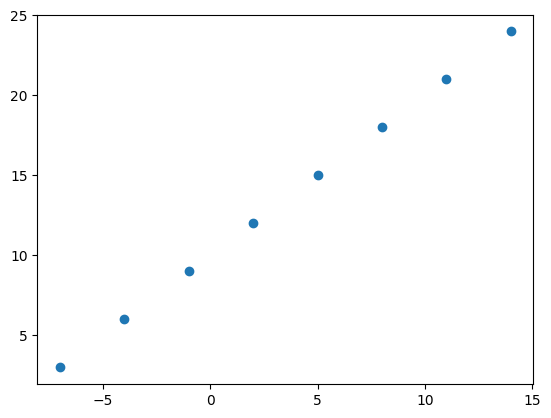

In [ ]:
plt.scatter(X, y)

## Steps in modeling Model in Pytorch

- Create
- Compile
- Fit

In [ ]:
torch.manual_seed(42)

#most important step. 1 input and 1 output otherwise error is too high
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output
print(X_tensor.shape)
print(y_tensor.shape)

# Create
model = torch.nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)

# Compile
model = torch.compile(model)
loss_function = nn.L1Loss()  # Equivalent to Mean Absolute Error (MAE)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Fit
epochs = 5

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor)
    loss = loss_function(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

torch.Size([8, 1])
torch.Size([8, 1])
Epoch [1/5], Loss: 9.9941
Epoch [2/5], Loss: 9.8616
Epoch [3/5], Loss: 9.7291
Epoch [4/5], Loss: 9.5966
Epoch [5/5], Loss: 9.4641


<ipython-input-20-9ba80fd299fb>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
<ipython-input-20-9ba80fd299fb>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output


In [ ]:
X, y

(tensor([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 tensor([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
# Set the model to evaluation mode
# model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor([17.0], dtype=torch.float32)
    # Reshape to match the input shape of your model
    input_tensor = input_tensor.unsqueeze(dim=-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[16.8522]])


In [ ]:
model(torch.tensor([17.0], dtype=torch.float32))

tensor([16.8522], grad_fn=<CompiledFunctionBackward>)

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

### Improving the model

In [ ]:
torch.manual_seed(42)

#most important step. 1 input and 1 output otherwise error is too high
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output
print(X_tensor.shape)
print(y_tensor.shape)

# Create
model = torch.nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)

# Compile
model = torch.compile(model)
loss_function = nn.L1Loss()  # Equivalent to Mean Absolute Error (MAE)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Fit
epochs = 100

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor)
    loss = loss_function(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")




torch.Size([8, 1])
torch.Size([8, 1])
Epoch [10/100], Loss: 8.8016
Epoch [20/100], Loss: 7.4766
Epoch [30/100], Loss: 6.6675
Epoch [40/100], Loss: 6.6112
Epoch [50/100], Loss: 6.5550
Epoch [60/100], Loss: 6.4987
Epoch [70/100], Loss: 6.4425
Epoch [80/100], Loss: 6.3862
Epoch [90/100], Loss: 6.3300
Epoch [100/100], Loss: 6.2737


<ipython-input-26-07f53016c1e0>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
<ipython-input-26-07f53016c1e0>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output


In [ ]:
X, y

(tensor([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 tensor([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor([17.0], dtype=torch.float32)
    # Reshape to match the input shape of your model
    input_tensor = input_tensor.unsqueeze(dim=-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[29.5147]])


In [ ]:
# Same as above but more flexible using delcaring explicitly
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Create the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single dense layer with one input and one output

    def forward(self, x): # PyTorch uses the __call__ method internally to invoke the forward method.
        return self.linear(x)

model = SimpleModel()

# 2. Define the loss function and optimizer
loss_function = nn.L1Loss()  # Equivalent to Mean Absolute Error (MAE)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with default learning rate

# 3. Training loop
epochs = 100
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor) #  PyTorch uses the __call__ method internally to invoke the forward method.
    loss = loss_function(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 12.2088
Epoch [20/100], Loss: 10.8838
Epoch [30/100], Loss: 9.5588
Epoch [40/100], Loss: 8.2338
Epoch [50/100], Loss: 6.9088
Epoch [60/100], Loss: 6.3798
Epoch [70/100], Loss: 6.3235
Epoch [80/100], Loss: 6.2673
Epoch [90/100], Loss: 6.2110
Epoch [100/100], Loss: 6.1548


<ipython-input-29-3e16677a8892>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
<ipython-input-29-3e16677a8892>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output


In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor([17.0], dtype=torch.float32)
    # Reshape to match the input shape of your model
    input_tensor = input_tensor.unsqueeze(dim=-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[29.3535]])


#### Creating larger dataset

In [ ]:
X = torch.arange(-100, 100, 4) # Features
y = X + 10 # Labels
X, y

(tensor([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,  -56,
          -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,  -12,   -8,
           -4,    0,    4,    8,   12,   16,   20,   24,   28,   32,   36,   40,
           44,   48,   52,   56,   60,   64,   68,   72,   76,   80,   84,   88,
           92,   96]),
 tensor([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42, -38,
         -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18,
          22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,  66,  70,  74,
          78,  82,  86,  90,  94,  98, 102, 106]))

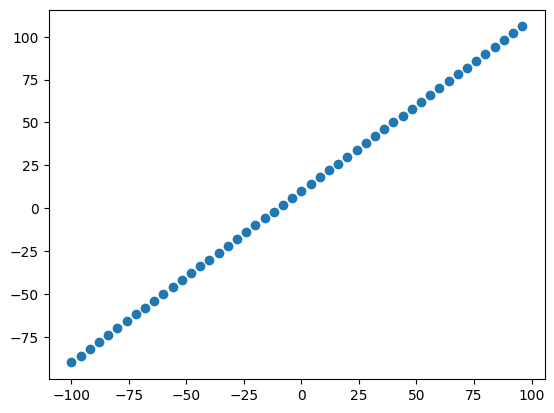

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Visualizing the data

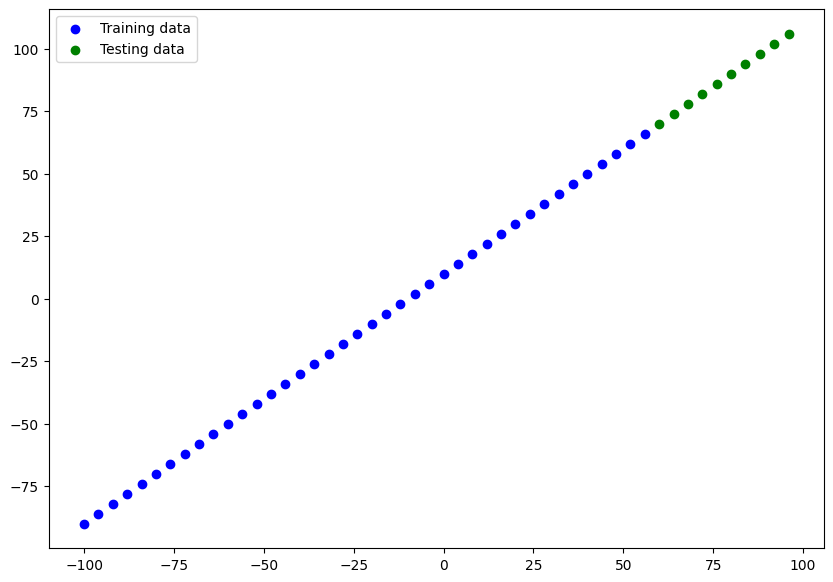

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend ( to recognize the plot apart)
plt.legend();

#### Model

In [ ]:
torch.manual_seed(42)


import torch
import torch.nn as nn
import torch.optim as optim

# Create
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.input_layer= nn.Linear(1, 10)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(10, 1)
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x
model = SimpleModel()

# Compile
loss_function = nn.L1Loss()  # Equivalent to Mean Absolute Error (MAE)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with default learning rate


In [ ]:
from torchsummary import summary
summary(model, input_size=(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              20
              ReLU-2                   [-1, 10]               0
            Linear-3                    [-1, 1]              11
Total params: 31
Trainable params: 31
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
# # Create dummy input tensor for visualization
# dummy_input = torch.randn(1, 1)
# dummy_input

In [ ]:
# from torchviz import make_dot
# from IPython.display import Image, display

# # Visualize the model
# graph = make_dot(model(dummy_input), params=dict(model.named_parameters()))
# graph.render("model_graph", format="png", cleanup=True)  # Saves the graph as PNG
# display(Image("model_graph.png"))

In [ ]:
X_train

tensor([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,  -56,
         -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,  -12,   -8,
          -4,    0,    4,    8,   12,   16,   20,   24,   28,   32,   36,   40,
          44,   48,   52,   56])

In [ ]:
torch.tensor(X_train[:10], dtype=torch.float32).unsqueeze(-1)

<ipython-input-374-d9783f63df1c>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X_train[:10], dtype=torch.float32).unsqueeze(-1)


tensor([[-100.],
        [ -96.],
        [ -92.],
        [ -88.],
        [ -84.],
        [ -80.],
        [ -76.],
        [ -72.],
        [ -68.],
        [ -64.]])

In [ ]:
# Fit the model
epochs = 100
X_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor) #  PyTorch uses the __call__ method internally to invoke the forward method.
    loss = loss_function(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 12.1294
Epoch [20/100], Loss: 4.4827
Epoch [30/100], Loss: 12.8273
Epoch [40/100], Loss: 4.7725
Epoch [50/100], Loss: 11.2615
Epoch [60/100], Loss: 8.5029
Epoch [70/100], Loss: 10.6761
Epoch [80/100], Loss: 10.2805
Epoch [90/100], Loss: 11.4691
Epoch [100/100], Loss: 15.2860


<ipython-input-375-e09ab5a956ea>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
<ipython-input-375-e09ab5a956ea>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output


#### Visualizing model Prediction

In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[ 88.1673],
        [ 93.9870],
        [ 99.8066],
        [105.6263],
        [111.4459],
        [117.2656],
        [123.0853],
        [128.9049],
        [134.7245],
        [140.5442]])


<ipython-input-376-77684a413860>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)


In [ ]:
y_test, y_pred.squeeze()

(tensor([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 tensor([ 88.1673,  93.9870,  99.8066, 105.6263, 111.4459, 117.2656, 123.0853,
         128.9049, 134.7245, 140.5442]))

In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[ 88.1673],
        [ 93.9870],
        [ 99.8066],
        [105.6263],
        [111.4459],
        [117.2656],
        [123.0853],
        [128.9049],
        [134.7245],
        [140.5442]])


<ipython-input-378-77684a413860>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)


In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth1
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")

  # for legend
  plt.legend()

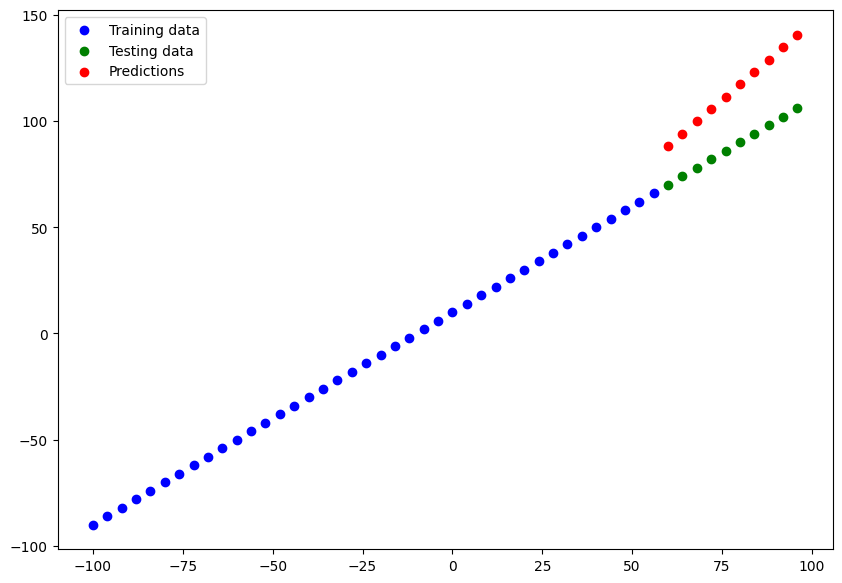

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

#### Evaluating model using regression metrics

In [ ]:
loss_function = nn.L1Loss() #mae
test_loss = loss_function(y_test, y_pred.squeeze())
print(test_loss.item())

26.355762481689453


In [ ]:
def mae(y_true, y_pred):
    return torch.mean(torch.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

In [ ]:
mae(y_test, y_pred.squeeze()), mse(y_test, y_pred.squeeze())

(tensor(26.3558), tensor(721.9432))

#### Try to Improve the model with experimentation

##### Good model: Single layer model with Relu

In [ ]:
torch.manual_seed(42)

#most important step. 1 input and 1 output otherwise error is too high
X_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output
print(X_tensor.shape)
print(y_tensor.shape)


# Create
model = torch.nn.Sequential(
    nn.Linear(in_features=1, out_features=1),
    nn.ReLU()
)

# Compile
model = torch.compile(model)
loss_function = nn.L1Loss()  # Equivalent to Mean Absolute Error (MAE)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Fit
epochs = 100

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor)
    loss = loss_function(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

<ipython-input-389-2460ba671fa9>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
<ipython-input-389-2460ba671fa9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output


torch.Size([40, 1])
torch.Size([40, 1])
Epoch [10/100], Loss: 28.1428
Epoch [20/100], Loss: 28.1349
Epoch [30/100], Loss: 28.1371
Epoch [40/100], Loss: 28.1292
Epoch [50/100], Loss: 28.1314
Epoch [60/100], Loss: 28.1236
Epoch [70/100], Loss: 28.1258
Epoch [80/100], Loss: 28.1179
Epoch [90/100], Loss: 28.1201
Epoch [100/100], Loss: 28.1133


In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
    y_pred = model(input_tensor)

print(y_pred)

<ipython-input-390-77684a413860>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)


tensor([[ 73.6338],
        [ 78.4760],
        [ 83.3181],
        [ 88.1603],
        [ 93.0024],
        [ 97.8446],
        [102.6868],
        [107.5289],
        [112.3711],
        [117.2132]])


In [ ]:
mae(y_test, y_pred.squeeze()), mse(y_test, y_pred.squeeze())

(tensor(7.4235), tensor(60.9598))

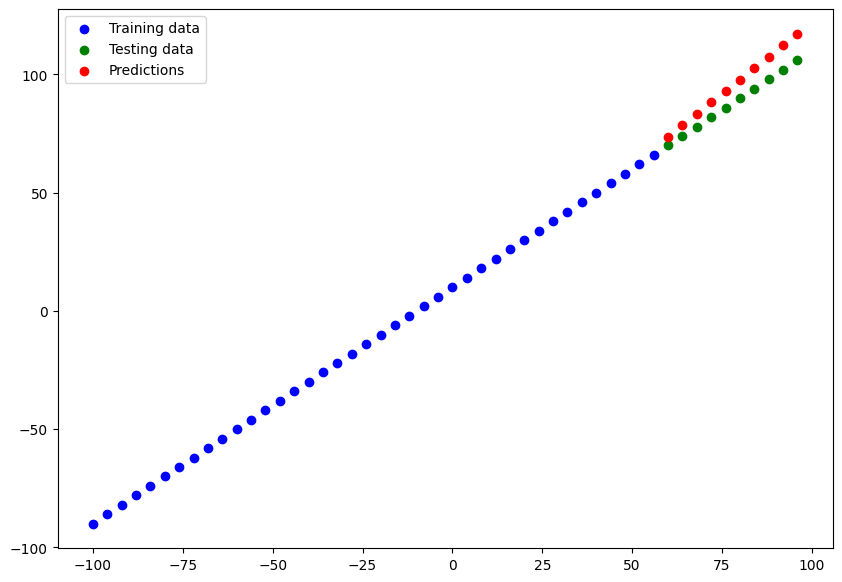

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

##### Best model : 3 Dense & 1 activation (input, hidden_dense,Relu, output)

In [ ]:
torch.manual_seed(42)


import torch
import torch.nn as nn
import torch.optim as optim

# Create
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.input_layer= nn.Linear(1, 10)
        self.hidden_dense_0 = nn.Linear(10, 10)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(10, 1)
    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_dense_0(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x
model = SimpleModel()

# Compile
loss_function = nn.L1Loss()  # Equivalent to Mean Absolute Error (MAE)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with default learning rate

# Fit the model
epochs = 100
X_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output

for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor) #  PyTorch uses the __call__ method internally to invoke the forward method.
    loss = loss_function(predictions, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 14.7456
Epoch [20/100], Loss: 6.6026
Epoch [30/100], Loss: 22.6525
Epoch [40/100], Loss: 21.5511
Epoch [50/100], Loss: 10.8806
Epoch [60/100], Loss: 14.4612
Epoch [70/100], Loss: 23.2453
Epoch [80/100], Loss: 10.9077
Epoch [90/100], Loss: 11.7904
Epoch [100/100], Loss: 23.7969


<ipython-input-418-9b2d7b1f15b4>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for input
<ipython-input-418-9b2d7b1f15b4>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add an extra dimension for output


In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[ 72.4130],
        [ 77.2332],
        [ 82.0534],
        [ 86.8737],
        [ 91.6939],
        [ 96.5141],
        [101.3343],
        [106.1546],
        [110.9748],
        [115.7950]])


<ipython-input-419-77684a413860>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)


In [ ]:
mae(y_test, y_pred.squeeze()), mse(y_test, y_pred.squeeze())

(tensor(6.1040), tensor(42.8091))

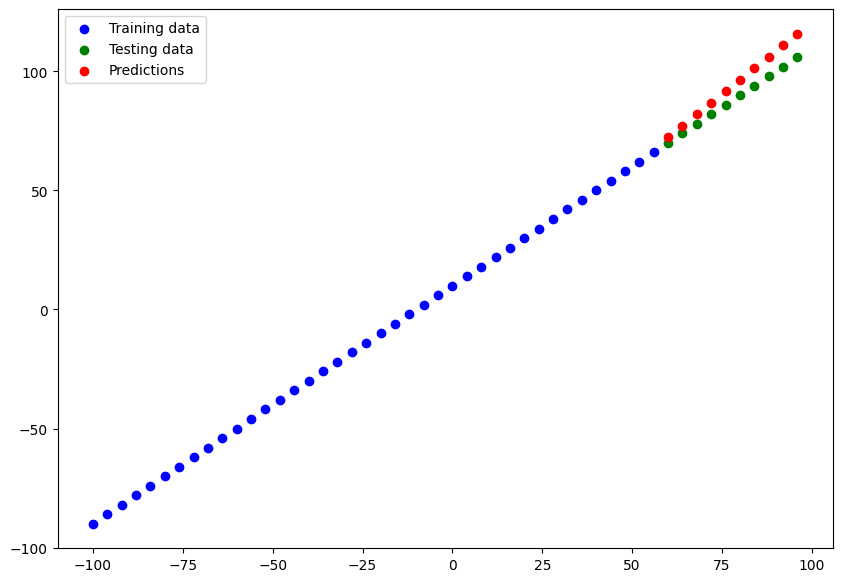

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Save the model

In [ ]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'model.pth')
print("Model saved successfully.")

Model saved successfully.


### Load the model

In [ ]:
model.load_state_dict(torch.load('model.pth'))

<ipython-input-423-fe08fbba245f>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
    y_pred = model(input_tensor)

print(y_pred)

tensor([[ 72.4130],
        [ 77.2332],
        [ 82.0534],
        [ 86.8737],
        [ 91.6939],
        [ 96.5141],
        [101.3343],
        [106.1546],
        [110.9748],
        [115.7950]])


<ipython-input-424-77684a413860>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)


In [ ]:
mae(y_test, y_pred.squeeze()), mse(y_test, y_pred.squeeze())

(tensor(6.1040), tensor(42.8091))

## Large Example

In [ ]:
# import required libraries

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Check for null values
null_values = insurance.isnull()
print(null_values)

# Sum of null values in each column
null_sum = insurance.isnull().sum()
print(null_sum)

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

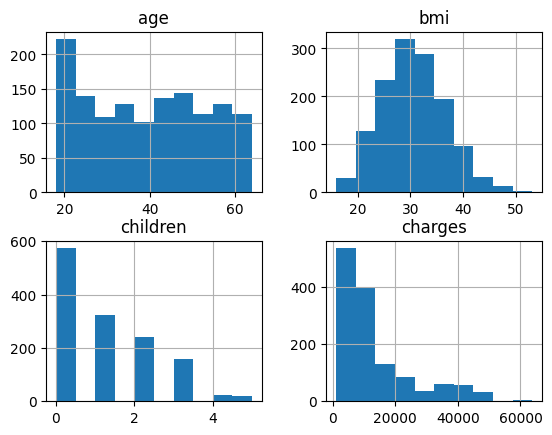

In [ ]:
insurance.hist()

In [ ]:
insurance_one_hot = pd.get_dummies(insurance, dtype=float)

In [ ]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47,24.320,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52,24.860,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,39,34.320,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,54,21.470,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1130,39,23.870,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,58,25.175,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
860,37,47.600,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train.values, X_train.values.shape, y_train.values, y_train.values.shape

(array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
        [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        ...,
        [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
        [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]]),
 (1070, 11),
 array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
        46113.511  , 10214.636  ]),
 (1070,))

In [ ]:
torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(-1).shape

torch.Size([1070, 1])

### Models

#### Model_1

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
torch.manual_seed(42)

# Assuming X_train is a numpy array or pandas DataFrame
input_dim = X_train.values.shape[1]

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# Convert X_train and y_train to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# 1. Create a model
class InsuranceModel(nn.Module):
    def __init__(self, input_dim):
        super(InsuranceModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)  # 100 neurons in the first layer
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(100, 10)        # 10 neurons in the second layer
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(10, 1)          # Output layer with 1 output

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        # x = self.relu1(x)
        x = self.layer2(x)
        # x = self.relu2(x)
        x = self.layer3(x)
        return x

model = InsuranceModel(input_dim=input_dim)

# 2. Compile the model
loss_function = nn.L1Loss()  # Mean Absolute Error (MAE) loss
optimizer = optim.Adam(model.parameters(), lr = 0.01)  # Use Adam optimizer with learning rate 0.001


In [ ]:
# Check model device
next(model.parameters()).device

device(type='cpu')

In [ ]:

# 3. Fit the model
epochs = 100
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_train_tensor)
    loss = loss_function(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(torch.tensor(X_test_tensor, dtype=torch.float32))

      # 2. Caculate loss on test data
      test_loss = loss_function(test_pred,torch.tensor(y_test_tensor, dtype=torch.float32)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach())
            test_loss_values.append(test_loss.detach())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

<ipython-input-65-55987d25b073>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_pred = model(torch.tensor(X_test_tensor, dtype=torch.float32))
<ipython-input-65-55987d25b073>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = loss_function(test_pred,torch.tensor(y_test_tensor, dtype=torch.float32)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type


Epoch: 0 | MAE Train Loss: 13325.455078125 | MAE Test Loss: 12933.1806640625 
Epoch: 10 | MAE Train Loss: 12981.2861328125 | MAE Test Loss: 12534.4365234375 
Epoch: 20 | MAE Train Loss: 11724.0107421875 | MAE Test Loss: 11162.8720703125 
Epoch: 30 | MAE Train Loss: 9487.1240234375 | MAE Test Loss: 9153.5322265625 
Epoch: 40 | MAE Train Loss: 8565.177734375 | MAE Test Loss: 9013.767578125 
Epoch: 50 | MAE Train Loss: 8611.7158203125 | MAE Test Loss: 8954.892578125 
Epoch: 60 | MAE Train Loss: 8513.716796875 | MAE Test Loss: 8738.099609375 
Epoch: 70 | MAE Train Loss: 8493.57421875 | MAE Test Loss: 8748.3740234375 
Epoch: 80 | MAE Train Loss: 8481.8837890625 | MAE Test Loss: 8803.6923828125 
Epoch: 90 | MAE Train Loss: 8469.841796875 | MAE Test Loss: 8765.51171875 


In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [ ]:
X_train_tensor.device, y_train_tensor.device, X_test_tensor.device, y_test_tensor.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [ ]:
# Set the model to evaluation mode
model.eval()

# Make predictions with torch.no_grad() # ensure gradient arenot calculated efficient prediction
with torch.no_grad():
    input_tensor = X_test_tensor
    y_pred = model(input_tensor)

print(y_test.values[:10],y_pred.squeeze()[:10])

[ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421 ] tensor([ 9057.7900,  8530.1055, 11150.4082,  9342.8916,  6986.0483, 10177.6865,
         5665.1318, 12639.9365,  5931.2231, 10070.6963], device='cuda:0')


In [ ]:
# # Plot the loss curves if cpu used
# plt.plot(epoch_count, train_loss_values, label="Train loss")
# plt.plot(epoch_count, test_loss_values, label="Test loss")
# plt.title("Training and test loss curves")
# plt.ylabel("Loss")
# plt.xlabel("Epochs")
# plt.legend();

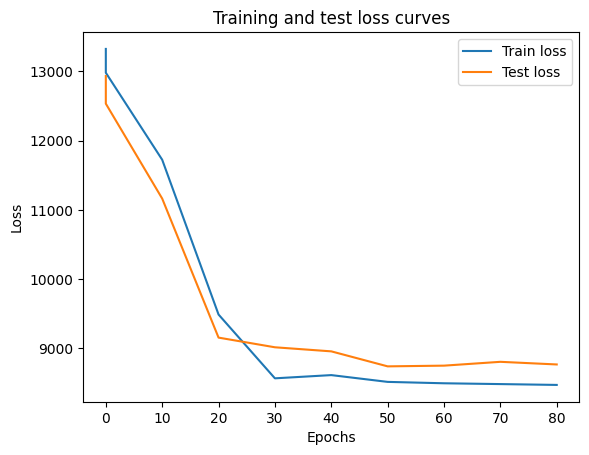

In [ ]:
# Plot the loss curves if gpu used
plt.plot(epoch_count[:-1],  # Remove the last element of epoch_count to match dimensions
         [t.cpu().numpy() for t in train_loss_values],
         label="Train loss")
plt.plot(epoch_count[:-1],  # Remove the last element of epoch_count to match dimensions
         [t.cpu().numpy() for t in test_loss_values],
         label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();